In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, roc_curve, auc, f1_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
df_train = pd.read_csv('D:/WittingAI/Bank_churn/playground-series-s4e1/train.csv')

In [4]:
df_test = pd.read_csv('D:/WittingAI/Bank_churn/playground-series-s4e1/test.csv')

In [5]:
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [6]:
df_train.tail()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.0,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.0,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.0,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.0,1,0.0,1.0,71173.03,0
165033,165033,15732798,Ulyanov,850,France,Male,31.0,1,0.0,1,1.0,0.0,61581.79,1


In [7]:
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [8]:
df_train.shape

(165034, 14)

In [9]:
df_test.shape

(110023, 13)

In [10]:
print("Information About Dataset", "\n")
df_train.info()

print("="*90, "\n")

print("Describe the Dataset", "\n")
df_train.describe()

Information About Dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB

Describe the Dataset 



,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [11]:
print("Null Values", "\n")
df_train.isnull().sum()

Null Values 



id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df_train["Surname"].unique()

array(['Okwudilichukwu', 'Okwudiliolisa', 'Hsueh', ..., 'Aliyev',
       'McMinn', 'Elkins'], dtype=object)

In [13]:
df_test["Surname"].unique()

array(['Lucchese', 'Nott', 'K?', ..., 'Golubova', 'Schoenheimer',
       'Distefano'], dtype=object)

In [14]:
df_train["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
df_test["Geography"].unique()

array(['France', 'Germany', 'Spain'], dtype=object)

In [16]:
df_train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [17]:
df_test.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

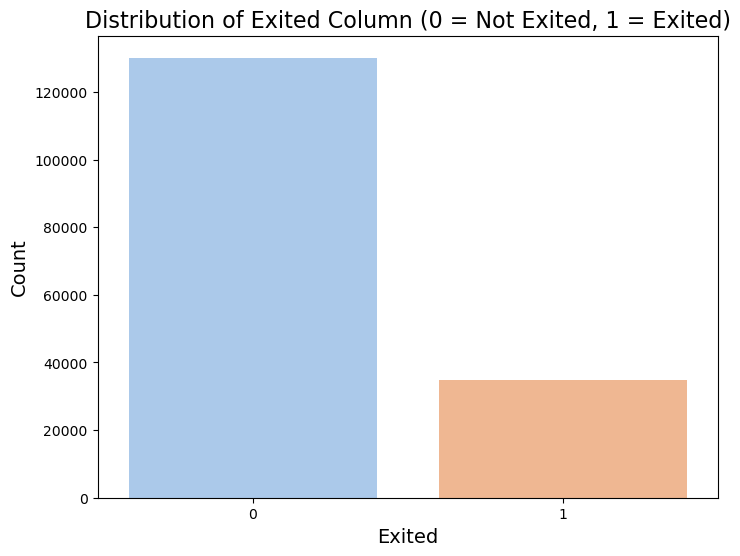

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Exited', data=df_train, palette='pastel')
plt.title('Distribution of Exited Column (0 = Not Exited, 1 = Exited)', fontsize=16)
plt.xlabel('Exited', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [19]:
# 0 means the customer did not churn (stayed with the bank).

# 1 means the customer churned (left the bank).

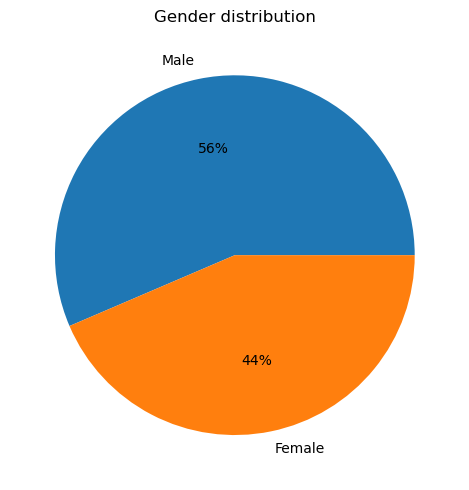

In [20]:
# Gender distribution

plt.figure(figsize = (10,5))

plt.pie(df_train['Gender'].value_counts().values, labels=['Male','Female'], autopct='%0.0f%%')

plt.title("Gender distribution")
plt.tight_layout()  # Adjust layout to prevent overlapping

plt.show()

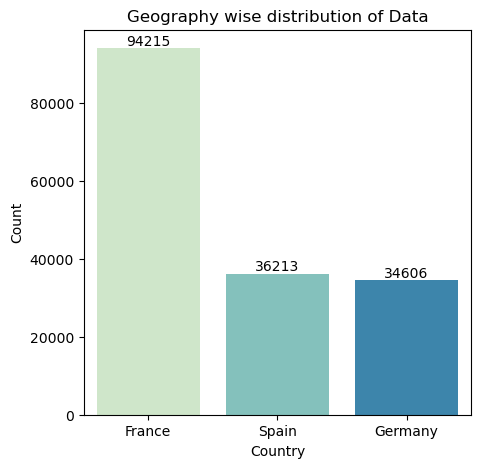

In [21]:
#Geography wise
region = df_train.Geography.value_counts().to_frame().reset_index()

region.columns = ['Country','Count']

plt.figure(figsize = (5,5))

plt.title('Geography wise distribution of Data')

ax=sns.barplot(x = region['Country'],y = region['Count'],palette='GnBu')
for i in ax.containers:
    ax.bar_label(i,)

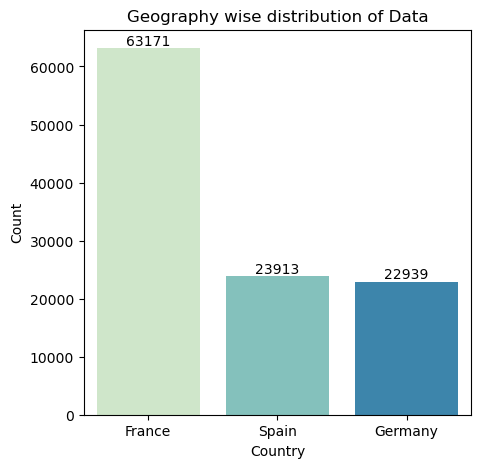

In [22]:
#Geography wise
region = df_test.Geography.value_counts().to_frame().reset_index()

region.columns = ['Country','Count']

plt.figure(figsize = (5,5))

plt.title('Geography wise distribution of Data')

ax=sns.barplot(x = region['Country'],y = region['Count'],palette='GnBu')
for i in ax.containers:
    ax.bar_label(i,)

## Data Cleaning

In [23]:
df_train.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True, errors='ignore')

In [24]:
df_test.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True, errors='ignore')

In [25]:
df_train.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [26]:
df_test.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


## Encoding the Dataset

In [27]:
encoder = LabelEncoder()

def encode(data):
    
    data['Gender'] = encoder.fit_transform(data['Gender'])
    data['Geography'] = encoder.fit_transform(data['Geography'])
    
    return data

In [28]:
encode(df_train)

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [29]:
encode(df_test)

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,570,2,1,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,575,0,0,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,712,0,1,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,709,0,0,32.0,3,0.00,1,1.0,1.0,158816.58


In [30]:
df_train.corr()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
id,1.000000,-0.001201,0.005552,0.001929,0.004039,-0.002560,0.000606,-0.000094,-0.004706,0.000418,-0.001552,0.002512
CreditScore,-0.001201,1.000000,0.005379,0.002310,-0.008918,0.000942,0.006973,0.011361,-0.002828,0.014790,-0.001820,-0.027383
Geography,0.005552,0.005379,1.000000,-0.012092,0.034110,0.000276,0.134642,-0.025123,-0.016715,-0.003493,-0.004102,0.053343
Gender,0.001929,0.002310,-0.012092,1.000000,-0.063139,0.008767,-0.014699,0.026098,0.006418,0.033722,-0.007778,-0.146442
Age,0.004039,-0.008918,0.034110,-0.063139,1.000000,-0.010830,0.064318,-0.102195,-0.012111,0.003320,-0.005399,0.340768
Tenure,-0.002560,0.000942,0.000276,0.008767,-0.010830,1.000000,-0.009481,0.007335,0.005327,-0.005532,0.000971,-0.019565
Balance,0.000606,0.006973,0.134642,-0.014699,0.064318,-0.009481,1.000000,-0.361033,-0.018584,-0.015073,0.008586,0.129743
NumOfProducts,-0.000094,0.011361,-0.025123,0.026098,-0.102195,0.007335,-0.361033,1.000000,0.005482,0.039736,-0.004285,-0.214554
HasCrCard,-0.004706,-0.002828,-0.016715,0.006418,-0.012111,0.005327,-0.018584,0.005482,1.000000,-0.021034,0.004438,-0.022141
IsActiveMember,0.000418,0.014790,-0.003493,0.033722,0.003320,-0.005532,-0.015073,0.039736,-0.021034,1.000000,-0.008080,-0.210237


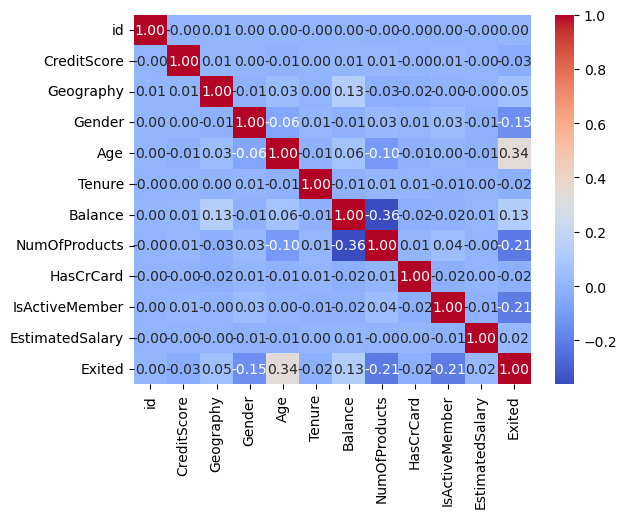

In [31]:
heatmap = sns.heatmap(df_train.corr(),annot=True,cmap='coolwarm', fmt=".2f")

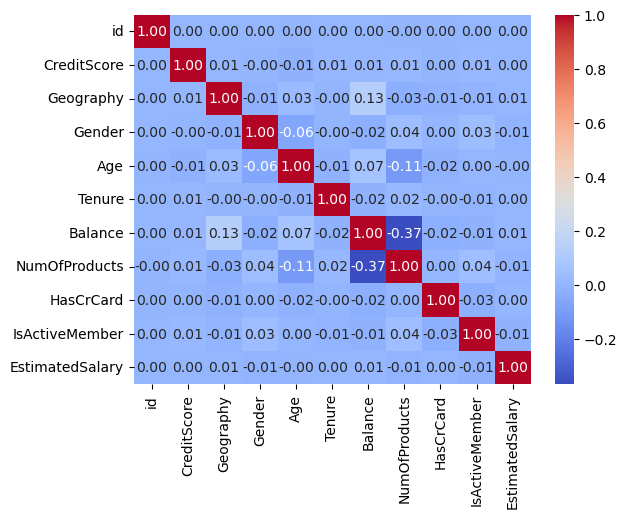

In [32]:
heatmap = sns.heatmap(df_test.corr(),annot=True,cmap='coolwarm', fmt=".2f")

In [34]:
x = df_train.drop(columns=["Exited"], inplace = False)
y = df_train["Exited"]

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
x_train.shape

(132027, 11)

In [37]:
y_train.shape

(132027,)

In [38]:
x_test.shape

(33007, 11)

In [39]:
y_test.shape

(33007,)

In [96]:
!pip install lightgbm

In [40]:
from lightgbm import LGBMClassifier 

In [41]:
model1 = LogisticRegression(max_iter=500, random_state=42)
model2 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model3 = DecisionTreeClassifier(max_depth=10, random_state=42)
model4 = LGBMClassifier(boosting_type='gbdt', max_depth=6, n_estimators=100, learning_rate=0.1, random_state=42)

In [42]:
columns = ['LogisticRegression', 'RandomForestClassifier' , 'DecisionTreeClassifier', 'LGBMClassifier']
accuracies=[]
f1_scores=[]

In [43]:
def call(model):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, pos_label = 1.0)

    accuracies.append(accuracy)
    f1_scores.append(f1)
    
    print("________MODEL EVALUATION ON TEST DATA________")
    print("Model: ")
    print(model)
    print()
    print("Accuracy of the Model: ", accuracy)
    print("\nF1 score of the Model:", f1)

In [44]:
call(model1)

________MODEL EVALUATION ON TEST DATA________
Model: 
LogisticRegression(max_iter=500, random_state=42)

Accuracy of the Model:  0.8269760959796407

F1 score of the Model: 0.4621904134099256


In [45]:
call(model2)

________MODEL EVALUATION ON TEST DATA________
Model: 
RandomForestClassifier(max_depth=10, random_state=42)

Accuracy of the Model:  0.8641803253855243

F1 score of the Model: 0.6142328543154634


In [46]:
call(model3)

________MODEL EVALUATION ON TEST DATA________
Model: 
DecisionTreeClassifier(max_depth=10, random_state=42)

Accuracy of the Model:  0.8597267246341685

F1 score of the Model: 0.6194312017096827


In [47]:
call(model4)

[LightGBM] [Info] Number of positive: 27966, number of negative: 104061
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 132027, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.211820 -> initscore=-1.313988
[LightGBM] [Info] Start training from score -1.313988
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
________MODEL EVALUATION ON TEST DATA________
Model: 
LGBMClassifier(max_depth=6, random_state=42)

Accuracy of the Model:  0.8672705789680977

F1 score of the Model: 0.6437342441245832


In [48]:
# !pip install autogluon

In [49]:
from autogluon.tabular import TabularPredictor
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df_train = pd.read_csv('D:/WittingAI/Bank_churn/playground-series-s4e1/train.csv')
df_test = pd.read_csv('D:/WittingAI/Bank_churn/playground-series-s4e1/test.csv')

# target column is 
target = 'Exited'

# Drop rows with missing target
df = df_train.dropna(subset=[target])

df_train = df_train.dropna(subset=[target])

train_data, val_data = train_test_split(df_train, test_size=0.2, random_state=42)

# Initialize the AutoGluon predictor
predictor = TabularPredictor(label=target, eval_metric='f1', problem_type='binary').fit(
    train_data=df_train, 
    presets='best_quality',  # Use 'best_quality' for best accuracy, 'medium_quality_faster_train' for faster training
    time_limit=600  # Time limit in seconds for training
)

# Make predictions on the validation data
val_preds = predictor.predict(val_data)

# Evaluate the model
results = predictor.evaluate(val_data)
print("Performance Metrics:", results)

# Make predictions on test data
preds = predictor.predict(df_test)
print(preds)

# Calculate accuracy and f1 score
accuracy = accuracy_score(val_data[target], val_preds)
f1 = f1_score(val_data[target], val_preds)

# Make predictions on the test data (which doesn't have the 'Exited' column)
test_preds = predictor.predict(df_test)

# Save predictions to a CSV file
submission = pd.DataFrame({'CustomerId': df_test['CustomerId'], 'Exited': test_preds})
submission.to_csv('D:/WittingAI/Bank_churn/predictions.csv', index=False)

print("\nPredictions saved to 'predictions.csv'")

No path specified. Models will be saved in: "AutogluonModels\ag-20250405_190708"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.7
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          16
Memory Avail:       5.36 GB / 15.42 GB (34.8%)
Disk Space Avail:   19.51 GB / 175.78 GB (11.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the data. Then holdout v

KeyboardInterrupt: 

In [ ]:
accuracy = accuracy_score(val_data[target], val_preds)
print(f"AutoGluon Model Accuracy: {accuracy * 100:.2f}%")

In [ ]:
f1 = f1_score(val_data[target], val_preds, pos_label = 1.0)
print(f"AutoGluon Model Accuracy: {f1:.2f}")

In [ ]:
predictor.leaderboard()

## Accuracy of the model

In [116]:
accuracies.append(accuracy)
columns.append('AutoGluon')

In [117]:
accuracies

[0.8269760959796407,
 0.8641803253855243,
 0.8597267246341685,
 0.8672705789680977,
 0.8813282031084315]

In [118]:
FinalResult = pd.DataFrame({'Algorithm':columns, 'Accuracy':accuracies})

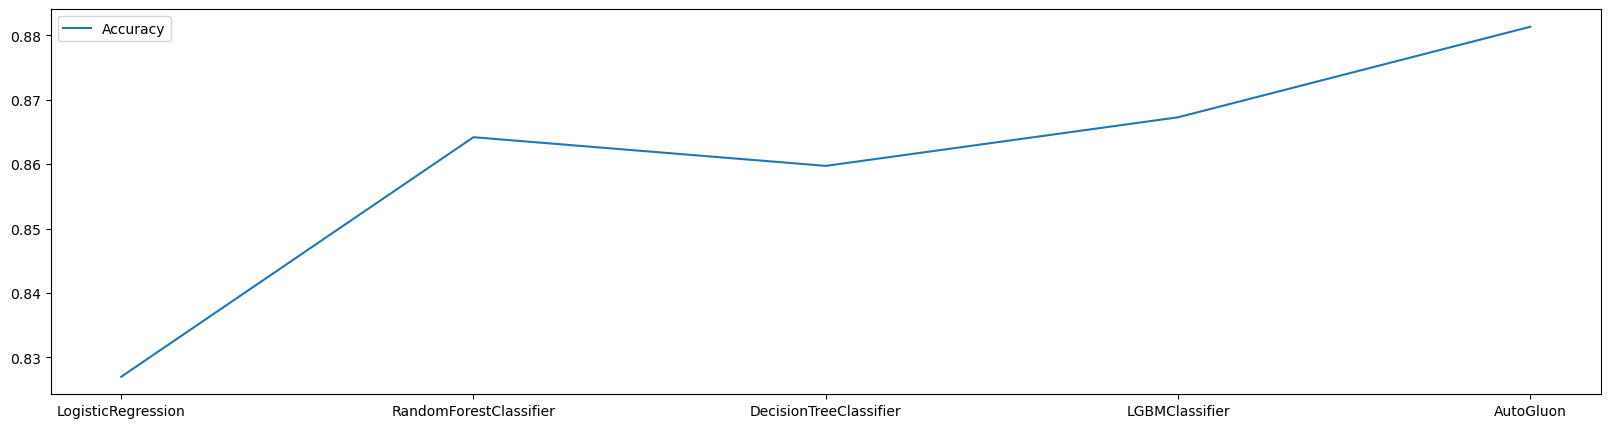

In [119]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(FinalResult.Algorithm,accuracies,label="Accuracy")
plt.legend()
plt.show()

In [120]:
model1.score(x_train,y_train)

0.8255735569239625

In [121]:
y_pred1 = model1.predict(x_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [122]:
print("Length of y_pred1: ", len(y_pred1))

accuracy_1 = accuracy_score(y_test, y_pred1)
print("Accuracy: {:.2f}%".format(accuracy_1 * 100))

Length of y_pred1:  33007
Accuracy: 82.70%


In [123]:
model2.score(x_train,y_train)

0.8702916827618593

In [124]:
y_pred2 = model2.predict(x_test)
y_pred2

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [125]:
print("Length of y_pred2: ", len(y_pred2))

accuracy_2 = accuracy_score(y_test, y_pred2)
print("Accuracy: {:.2f}%".format(accuracy_2 * 100))

Length of y_pred2:  33007
Accuracy: 86.42%


In [126]:
model3.score(x_train,y_train)

0.8726927067948222

In [127]:
y_pred3 = model3.predict(x_test)
y_pred3

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [128]:
print("Length of y_pred3: ", len(y_pred3))

accuracy_3 = accuracy_score(y_test, y_pred3)
print("Accuracy: {:.2f}%".format(accuracy_3 * 100))

Length of y_pred3:  33007
Accuracy: 85.97%


In [129]:
model4.score(x_train,y_train)

0.8686935248093193

In [130]:
y_pred4 = model4.predict(x_test)
y_pred4

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [131]:
print("Length of y_pred4: ", len(y_pred4))

accuracy_4 = accuracy_score(y_test, y_pred4)
print("Accuracy: {:.2f}%".format(accuracy_4 * 100))

Length of y_pred4:  33007
Accuracy: 86.73%


In [132]:
accuracy = accuracy_score(val_data[target], val_preds)
print(f"AutoGluon Model Accuracy: {accuracy * 100:.2f}%")

f1 = f1_score(val_data[target], val_preds, pos_label = 1.0)
print(f"\nAutoGluon Model Accuracy: {f1:.2f}")

AutoGluon Model Accuracy: 88.13%

AutoGluon Model Accuracy: 0.73


In [133]:
FinalResult = pd.DataFrame({'Algorithm':columns, 'Accuracy':accuracies})
FinalResult

,Algorithm,Accuracy
0,LogisticRegression,0.826976
1,RandomForestClassifier,0.864180
2,DecisionTreeClassifier,0.859727
3,LGBMClassifier,0.867271
4,AutoGluon,0.881328


Text(0.5, 1.0, 'Model vs Accuracy_score')

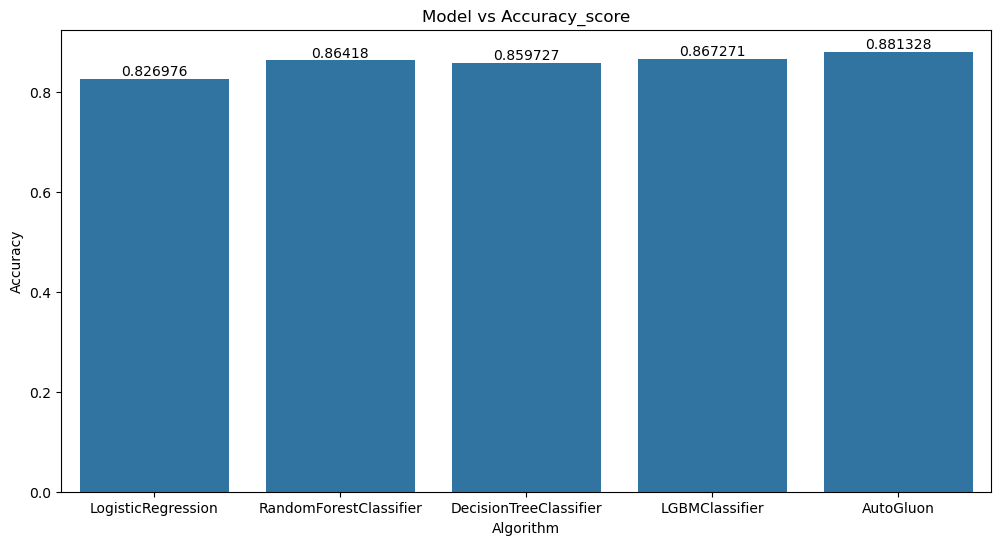

In [134]:
#Barplot of accuracies
plt.figure(figsize = (12, 6))

ax = sns.barplot(x = "Algorithm", y = "Accuracy", data = FinalResult)
for i in ax.containers:
    ax.bar_label(i, )

plt.title('Model vs Accuracy_score')